In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_excel('Cascade_Seismic_Stations.xlsx', sheet_name='Lassen')
df_t=df.iloc[0:13, :]
df_t=df_t.sort_values('Start Yr', ascending=True)

In [8]:
sp1_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']>=2022)
bb3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']>=2022)
sp3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']>=2022)

sp1_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']<2022)
bb3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']<2022)
sp3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']<2022)

In [9]:
df_t.loc[sp3_p]

,Network,Name_No_Temp,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
10,NC,LRR,LRR (upgrade),40.466305,-121.622299,1987-08-12,3000-01-01 00:00:00,2011.0,3000.0,3sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Loop for unique /name

C:\Users\penny\AppData\Local\Temp\ipykernel_22132\2486516006.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(name.tolist())#, rotation=90)


['LBA' 'LCF' 'LMZ' 'LRD' 'LSL' 'LRR' 'LME' 'LSI' 'LEL' 'LDH']


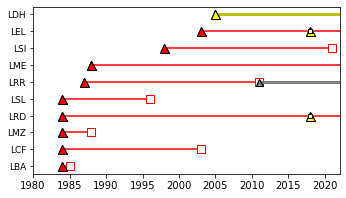

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10*(139.5/254),4*(78.1/101.6)), sharey=True)

Unique_station=df_t['Name_No_Temp'].unique()
i=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t['Name_No_Temp'].loc[df_t['Name_No_Temp']==station].iloc[0])
    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t['Name_No_Temp']==station)&(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i, i], '-r')
        ax1.plot([df_t['End Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i, i], 'sk', mec='red',mfc='white', ms=8)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['Start Yr'].loc[Stat_type_1sp]], [i, i], '^k', mfc='red', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3bb"):
        Stat_type_3bb=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], '-y', linewidth=3)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], 'sk', mec='k', mfc='white', ms=4, zorder=1000)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['Start Yr'].loc[Stat_type_3bb]], [i, i],  '^k', mfc='yellow', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3sp"):
        Stat_type_3sp=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i, i], '-', color='grey', linewidth=3, zorder=100)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i, i], '*k', mfc='grey', ms=12, zorder=100)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['Start Yr'].loc[Stat_type_3sp]], [i, i], '^k', mfc='grey', ms=7, zorder=100)
        
        # Now print the lines
        
    i=i+1

#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3bb":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='y', lw=3)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='yellow', ms=12)
        
#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3sp":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='grey', lw=3)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='grey', ms=12)
        
        
#     #ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
#     #ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white', ms=8)
ax1.set_xlim([1980, 2022])
#     name[i]=str(df_t['Name'].iloc[i])
#     #print(df_t['Name'].iloc[i])
ax1.set_yticklabels(name.tolist())#, rotation=90)
ticks_loc = ax1.get_yticks().tolist()
ax1.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(name)
ax1.set_yticklabels(name.tolist(), fontsize=9)

# #df_t['Classification: 1sp, 3sp, 3bb ']
fig.savefig('Lassen_Seismic_Stations.png', dpi=300)

In [11]:
df_t['Name_No_Temp'].loc[df_t['Name_No_Temp']==station].iloc[0]

'LDH'

In [12]:
df_stat=df_t.loc[df_t['Name_No_Temp']==""]

In [13]:
if any(df_t['Name']=="LEL")


SyntaxError: invalid syntax (1485472890.py, line 1)

In [14]:
df_stat['Classification: 1sp, 3sp, 3bb '].values

array([], dtype=object)

In [12]:
df_stat['End Yr'].values

array([1985.])

ERROR! Session/line number was not unique in database. History logging moved to new session 9596


yes


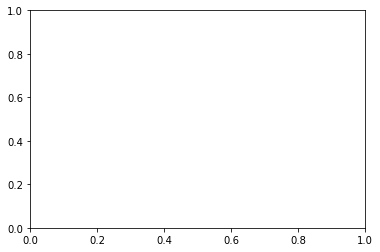

In [ ]:
df_stat
if df_stat['Classification: 1sp, 3sp, 3bb '].values=="1sp":
    j=1
    print('yes')
    plt.plot([df_stat['Start Yr'].values,df_stat['End Yr'].values, [j, j]], '-r')

In [9]:
df_stat

,Network,Name_No_Temp,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NC,LBA,LBA,40.572666,-121.431,1984-01-01,1985-07-18 00:00:00,1984.0,1985.0,1sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ERROR! Session/line number was not unique in database. History logging moved to new session 9594


LBA


C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


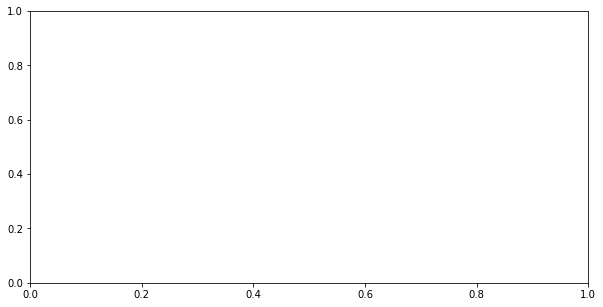

In [ ]:
##  Line chart on network name



fig, (ax1) = plt.subplots(1, 1, figsize=(10,5), sharey=True)
#name=np.empty((len(df_t)),  np.dtype('U100'))
Unique_station=df_t['Name_No_Temp'].unique()
i=1
for station in Unique_station:
    print(station)
    df_stat=df_t.loc[df_t['Name_No_Temp']==station]
    if len(df_stat)==1:
    
        
        if df_stat['Classification: 1sp, 3sp, 3bb '].values=="1sp":
            ax1.plot([df_stat['Start Yr'],df_stat['End Yr'], [i, i]], '-r')
            ax1.plot([df_stat['End Yr'],df_stat['End Yr'], [i, i]], '*k', mfc='red', ms=12)

        if df_stat['Classification: 1sp, 3sp, 3bb '].values=="3bb":
            ax1.plot([df_stat['Start Yr'],df_stat['End Yr']], [i, i], '-',
                     color='y', lw=3)
            ax1.plot([df_stat['End Yr'],df_stat['End Yr']], [i, i], '*k', mfc='yellow', ms=12)

        if df_stat['Classification: 1sp, 3sp, 3bb '].values=="3sp":
            ax1.plot([df_stat['Start Yr'],df_stat['End Yr']], [i, i], '-',
                     color='grey', lw=3)
            ax1.plot([df_stat['End Yr'],df_stat['End Yr']], [i, i], '*k', mfc='grey', ms=12)    
    
    else:
        print('2 stations!')
    i+1
        
    #ax1.set_xlim([1980, 2022])
    #name[i]=str(df_stat['Name'])
    i+1
    #print(df_t['Name'].loc[df_t['Name_No_Temp']==station])
#ax1.set_yticklabels(name.tolist())#, rotation=90)
# ticks_loc = ax1.get_yticks().tolist()
# ax1.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# print(name)
# ax1.set_yticklabels(name.tolist())

#df_t['Classification: 1sp, 3sp, 3bb ']
    
    #print(df_t['Name'].iloc[i])
#ax1.set_yticklabels(name.tolist())#, rotation=90)
# ticks_loc = ax1.get_yticks().tolist()
# ax1.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# print(name)
# ax1.set_yticklabels(name.tolist())

#df_t['Classification: 1sp, 3sp, 3bb ']

# Line chart showing upgrades as separate stations

In [50]:
name_plot=np.empty((len(df_t)),  np.dtype('U100'))
for i in range(0, len(df_t)):
    name_plot[i]=str(df_t['Name_No_Temp'].iloc[i])

['LBA' 'LCF' 'LDH' 'LEL' 'LEL (temp)' 'LME' 'LMZ' 'LRD'
 'LRD (temp. upgrade)' 'LRR' 'LRR (upgrade)' 'LSI' 'LSL']


[Text(0, 0, 'LBA'),
 Text(0, 1, 'LCF'),
 Text(0, 2, 'LDH'),
 Text(0, 3, 'LEL'),
 Text(0, 4, 'LEL (temp)'),
 Text(0, 5, 'LME'),
 Text(0, 6, 'LMZ'),
 Text(0, 7, 'LRD'),
 Text(0, 8, 'LRD (temp. upgrade)'),
 Text(0, 9, 'LRR'),
 Text(0, 10, 'LRR (upgrade)'),
 Text(0, 11, 'LSI'),
 Text(0, 12, 'LSL')]

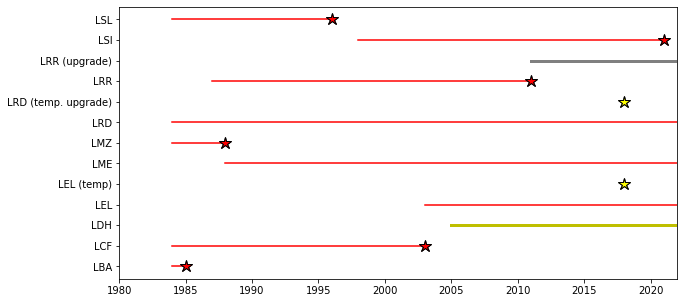

In [65]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5), sharey=True)
name=np.empty((len(df_t)),  np.dtype('U100'))
for i in range(0, len(df_t)):
    if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="1sp":
        ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-r')
        ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='red', ms=12)
        
    if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3bb":
        ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
                 color='y', lw=3)
        ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='yellow', ms=12)
        
    if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3sp":
        ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
                 color='grey', lw=3)
        ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='grey', ms=12)
        
        
    #ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
    #ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white', ms=8)
    ax1.set_xlim([1980, 2022])
    name[i]=str(df_t['Name'].iloc[i])
    #print(df_t['Name'].iloc[i])
#ax1.set_yticklabels(name.tolist())#, rotation=90)
ticks_loc = ax1.get_yticks().tolist()
ax1.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(name)
ax1.set_yticklabels(name.tolist())

#df_t['Classification: 1sp, 3sp, 3bb ']

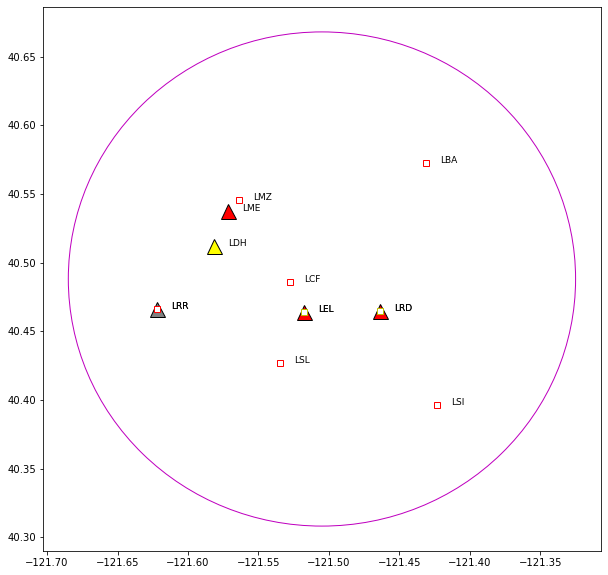

In [52]:
fig, (ax1) = plt.subplots(1, figsize=(10,10), sharey=True)

import matplotlib.patches as patches
rect = patches.Circle((-121.50496,40.488165),0.18,linewidth=1,edgecolor='m',facecolor='none', label='test')

# Add the patch to the Axes
ax1.add_patch(rect)

ax1.plot(df_t['Longitude'].loc[sp1_p],
              df_t['Latitude'].loc[sp1_p],
         '^k', mfc='red', ms=15)
ax1.plot(df_t['Longitude'].loc[bb3_p],
              df_t['Latitude'].loc[bb3_p],
         '^k', mfc='yellow', ms=15)
ax1.plot(df_t['Longitude'].loc[sp3_p],
              df_t['Latitude'].loc[sp3_p],
         '^k', mfc='grey', ms=15)


ax1.plot(df_t['Longitude'].loc[sp1_r],
              df_t['Latitude'].loc[sp1_r],
         'sr',  mfc='w')
ax1.plot(df_t['Longitude'].loc[bb3_r],
              df_t['Latitude'].loc[bb3_r],
         'sy',  mfc='w')
ax1.plot(df_t['Longitude'].loc[sp3_r],
              df_t['Latitude'].loc[sp3_r],
         's', mec='grey', mfc='w')
for i in range(0, len(df_t)):
    ax1.annotate(name_plot[i],
                 xy=(df_t['Longitude'].iloc[i]+0.01,
              df_t['Latitude'].iloc[i]),
                 xycoords="data", fontsize=9)

In [24]:
str(df_t['Name'].values)

"['LBA' 'LCF' 'LDH' 'LEL' 'LEL (temp)' 'LME' 'LMZ' 'LRD'\n 'LRD (temp. upgrade)' 'LRR' 'LRR (upgrade)' 'LSI' 'LSL']"

## Different plots showing age progresion

In [7]:
a=['Exp Pet', 'Exp Pet', 'MT', 'Seismics']
type(a)

list

In [8]:
name=np.empty(len(df_t), np.dtype('U100'))
df_t['Name'].iloc[1]
name[1]=str(df_t['Name'].iloc[1])

In [9]:
name

array(['', 'LCF', '', '', '', '', '', '', '', '', '', '', ''],
      dtype='<U100')

['LBA' 'LCF' 'LDH' 'LEL' 'LEL (temp)' 'LME' 'LMZ' 'LRD'
 'LRD (temp. upgrade)' 'LRR' 'LRR (upgrade)' 'LSI' 'LSL']


[Text(0, 0, 'LBA'),
 Text(0, 1, 'LCF'),
 Text(0, 2, 'LDH'),
 Text(0, 3, 'LEL'),
 Text(0, 4, 'LEL (temp)'),
 Text(0, 5, 'LME'),
 Text(0, 6, 'LMZ'),
 Text(0, 7, 'LRD'),
 Text(0, 8, 'LRD (temp. upgrade)'),
 Text(0, 9, 'LRR'),
 Text(0, 10, 'LRR (upgrade)'),
 Text(0, 11, 'LSI'),
 Text(0, 12, 'LSL')]

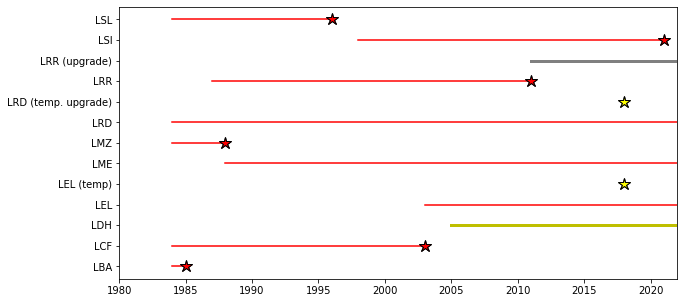

In [94]:
len(name)

13

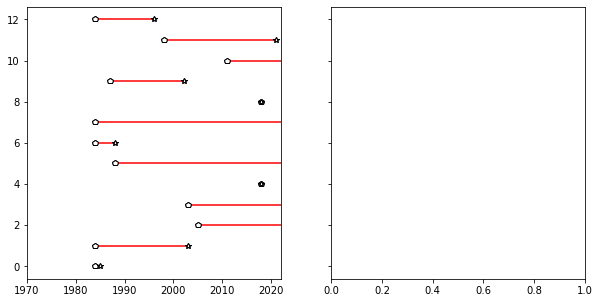

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
for i in range(0, len(df_t)):
    if 
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-r')
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
    ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white')
    ax1.set_xlim([1970, 2022])
#df_t['Classification: 1sp, 3sp, 3bb ']

# 0  Bar for each different seimometer

## 1. CDF function